<a href="https://colab.research.google.com/github/lehoangkhanh-17520623/CS114.L11.KHCL/blob/master/Logicstic_Regression_Fetal_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài toán: Sử dụng Logistics Regression phân loại sức khỏe

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, mean_squared_error

In [34]:
# import data
data_raw = pd.read_csv('fetal_health.csv')
data_raw


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [35]:

data = np.array(data_raw)
X = data[:, :-1]
Y = data[:, -1:]

X_train=data[ :1500 , :-1]
Y_train=data[ :1500 , -1]

X_test=data[1500: , :-1]
Y_test=data[1500: , -1]

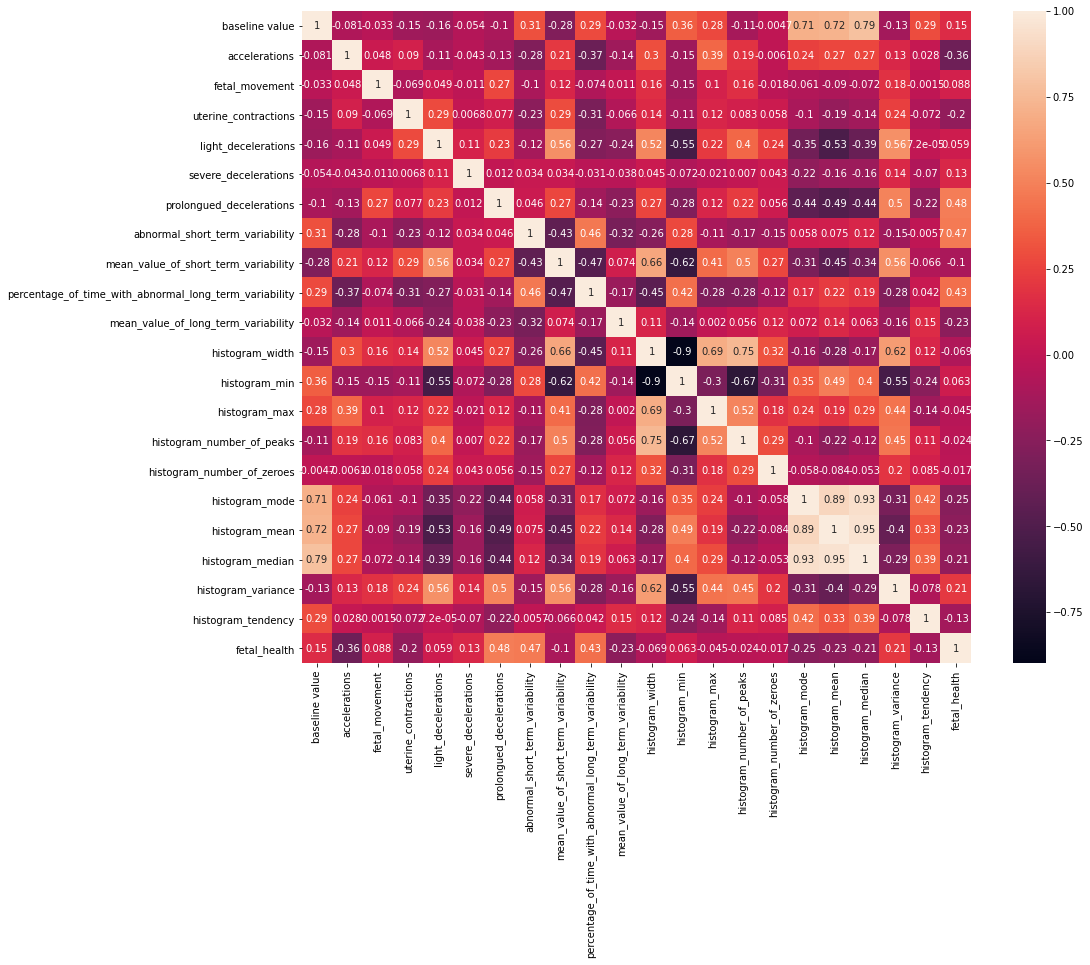

In [36]:
plt.figure(figsize=(15,12))
sns.heatmap(data_raw.corr(), annot=True)
#Xem những thuộc tính có correlation cao với fetal health

Huấn luyện mô hình

In [37]:
logreg = LogisticRegression(C=10.0, solver='liblinear').fit(X_train, Y_train)

Y_pred=logreg.predict(X_test)

Đánh giá mô hình

In [43]:
#Độ mất mát
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Mean squared error: ", round(mse, 3))
print("Root mean squared error: ", round(rmse, 3))

Mean squared error:  0.682
Root mean squared error:  0.826


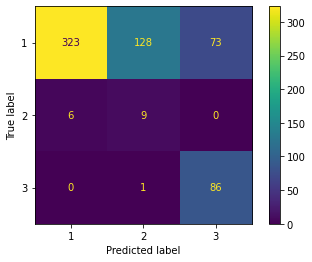

In [38]:
cm=confusion_matrix(Y_test, Y_pred)
cm_display=ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3]).plot(values_format="d")

In [39]:
print(classification_report(Y_test, Y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.98      0.62      0.76       524
           2       0.07      0.60      0.12        15
           3       0.54      0.99      0.70        87

    accuracy                           0.67       626
   macro avg       0.53      0.73      0.52       626
weighted avg       0.90      0.67      0.73       626

